In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

%matplotlib inline
plt.style.use('seaborn')

C:\Users\killr\AppData\Local\Temp\ipykernel_14152\2207770114.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
sales_alm = pd.read_excel('Продажи АЛМ.xlsx')
sales_ast = pd.read_excel('Продажи АСТ.xlsx')
sales_smt = pd.read_excel('Продажи ШМТ.xlsx')

stocks_alm = pd.read_excel('Остатки АЛМ.xlsx')
stocks_ast = pd.read_excel('Остатки АСТ.xlsx')
stocks_smt = pd.read_excel('Остатки ШМТ.xlsx')

stats_alm = pd.read_excel('Стат параметры АЛМ.xlsx')
stats_ast = pd.read_excel('Стат параметры АСТ.xlsx')
stats_smt = pd.read_excel('Стат параметры ШМТ.xlsx')

In [3]:
sales_alm.index = sales_alm['ДАТА']
sales_ast.index = sales_ast['ДАТА']
sales_smt.index = sales_smt['ДАТА']

stocks_alm.index = stocks_alm['ДАТА']
stocks_ast.index = stocks_ast['ДАТА']
stocks_smt.index = stocks_smt['ДАТА']

In [4]:
suppliers = pd.read_excel('ПАРАМЕТРЫ ПОСТАВЩИКОВ.xlsx')

suppliers['ПОСТАВЩИК'] = suppliers['ПОСТАВЩИК'].apply(lambda x: x[:15])

In [5]:
sales = [sales_alm, sales_ast, sales_smt]
stocks = [stocks_alm, stocks_ast, stocks_smt]
stats = [stats_alm, stats_ast, stats_smt]

In [6]:
for i in range(3):
    stats[i] = stats[i].fillna({'ДУБЛИКАТЫ':""})

{'104965', '114992'}

 АЛМ
Дата актуальности:  2023-12-22
Кластер:  Регулярные
Регулярность дни:  10
Плечо дни:  8
Остаток к приходу:  0
Середина оптимального остатка:  6850.0
Зона риска:  2350.0
Cредние продажи в день:  200.0
Целевой остаток:  4030.0
Заказ:  4030.0
Дубликаты:  
КЛИЕНТОВ:  10
Динамика продаж:  -0.07

 АСТ
Дата актуальности:  2023-12-22
Кластер:  Регулярные
Регулярность дни:  10
Плечо дни:  8
Остаток к приходу:  0
Середина оптимального остатка:  6847.0
Зона риска:  2779.0
Cредние продажи в день:  181.0
Целевой остаток:  4931.0
Заказ:  4931.0
Дубликаты:  
КЛИЕНТОВ:  17
Динамика продаж:  0.08

 ШМТ
Дата актуальности:  2023-12-22
Кластер:  Регулярные
Регулярность дни:  10
Плечо дни:  8
Остаток к приходу:  0
Середина оптимального остатка:  4783.0
Зона риска:  1729.0
Cредние продажи в день:  136.0
Целевой остаток:  2069.0
Заказ:  2069.0
Дубликаты:  
КЛИЕНТОВ:  10
Динамика продаж:  -0.33

 АЛМ
Дата актуальности:  2023-12-22
Кластер:  Плохие новинки
Регулярность дни:  10
Плечо

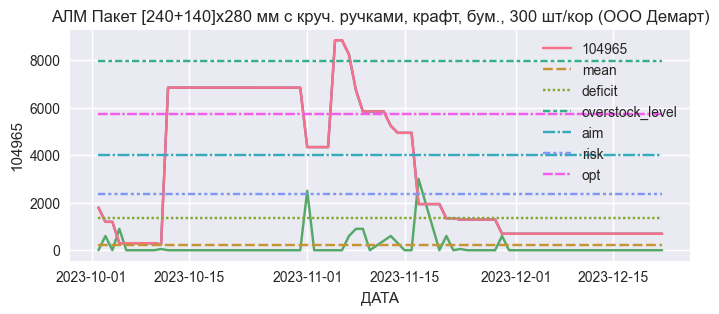

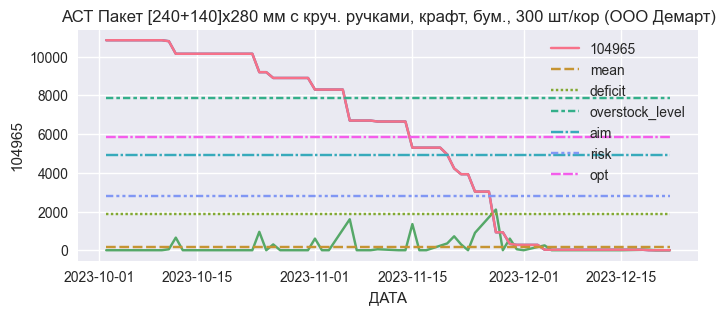

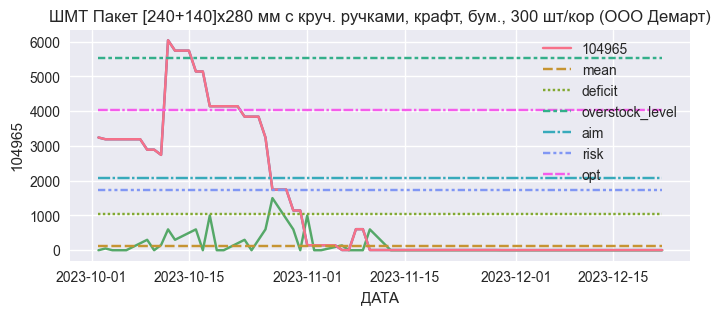

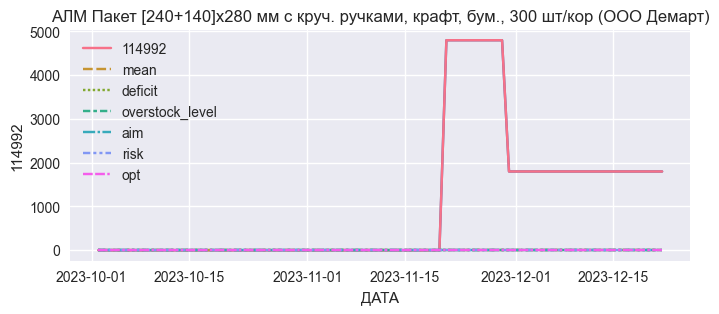

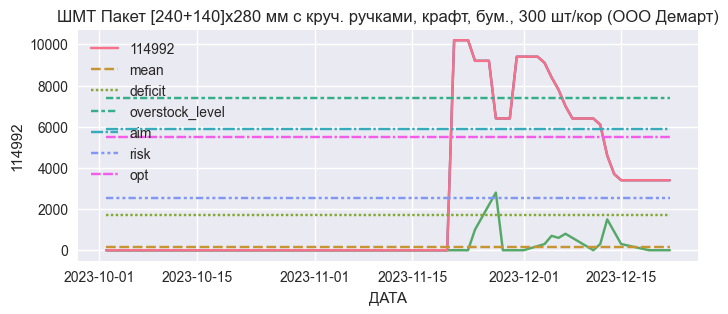

In [10]:
art =114992


art_set = set()
art_set = art_set.union({str(art)})


for i in range(3):
    if stats[i][stats[i]['АРТИКУЛ'] == art].shape[0]>0:
        art_name = stats[i][stats[i]['АРТИКУЛ'] == art]['ТОВАР'].iloc[0]


for i in range(3):
    if stats[i][stats[i]['ТОВАР'] == art_name]['АРТИКУЛ'].shape[0]>0:
        
        for j in range(stats[i][stats[i]['ТОВАР'] == art_name]['АРТИКУЛ'].shape[0]):
            art_main = stats[i][stats[i]['ТОВАР'] == art_name]['АРТИКУЛ'].iloc[j]
            dubs = stats[i][stats[i]['ТОВАР'] == art_name]['ДУБЛИКАТЫ'].iloc[j]
            art_set = art_set.union({str(art_main)})
        
        if len(dubs) > 0:
            art_set = art_set.union(set(re.sub(r'[,\[\]]','',dubs).split()))
        

print(art_set)

art_list = list()
for x in art_set:
    art_list.append(int(x))

d = {0:'АЛМ', 1: 'АСТ', 2: 'ШМТ'}

for art in art_list:
    for i in range(3):

        regularity_days = 10
        transport_days = 8

        if stats[i][stats[i]['АРТИКУЛ'] == art].shape[0]>0:
            supplier = stats[i][stats[i]['АРТИКУЛ'] == art]['ПОСТАВЩИК'].iloc[0]
    
            if supplier in list(suppliers['ПОСТАВЩИК'].values):
             regularity_days = suppliers[suppliers['ПОСТАВЩИК']== supplier]['РЕГУЛЯРНОСТЬ ДНИ'].iloc[0]
             transport_days = suppliers[suppliers['ПОСТАВЩИК']== supplier]['ПЛЕЧО ДНИ'].iloc[0] 
        
        if stats[i][stats[i]['АРТИКУЛ'] == art].shape[0]>0:
            print('\n',d[i])
            print('Дата актуальности: ' , str(stocks[i]['ДАТА'].max())[:10] )
            art_name = stats[i][stats[i]['АРТИКУЛ'] == art]['ТОВАР'].iloc[0]
            curr_stock = stats[i][stats[i]['АРТИКУЛ'] == art]['curr_stock'].iloc[0]
            deficit_level = stats[i][stats[i]['АРТИКУЛ'] == art]['deficit_level'].iloc[0]
            risk_zone_level = stats[i][stats[i]['АРТИКУЛ'] == art]['risk_zone_level'].iloc[0]
            optimum_zone_level = stats[i][stats[i]['АРТИКУЛ'] == art]['optimum_zone_level'].iloc[0]
            overstock_level = stats[i][stats[i]['АРТИКУЛ'] == art]['overstock_level'].iloc[0]
            mean_level = stats[i][stats[i]['АРТИКУЛ'] == art]['sales_mean'].iloc[0]
            sales_dynamics = stats[i][stats[i]['АРТИКУЛ'] == art]['sales_sym'].iloc[0]
            print('Кластер: ',stats[i][stats[i]['АРТИКУЛ']==art]['cluster_name'].iloc[0])
            print('Регулярность дни: ',regularity_days)
            print('Плечо дни: ',transport_days)

            stock_on_income = max([curr_stock - mean_level*transport_days,0])
            print('Остаток к приходу: ',stock_on_income)
            print('Середина оптимального остатка: ',(optimum_zone_level + (overstock_level-optimum_zone_level)/2).round(0))
            print('Зона риска: ',risk_zone_level.round(0))
            print('Cредние продажи в день: ',mean_level.round(0))

            aim_stock = (risk_zone_level + mean_level*regularity_days)*(1+sales_dynamics)
            print('Целевой остаток: ',aim_stock.round(0))
            order = stats[i][stats[i]['АРТИКУЛ'] == art]['order'].iloc[0]
            print('Заказ: ',order.round(0))
            print('Дубликаты: ',stats[i][stats[i]['АРТИКУЛ']==art]['ДУБЛИКАТЫ'].iloc[0])
            print('КЛИЕНТОВ: ',stats[i][stats[i]['АРТИКУЛ']==art]['КЛИЕНТОВ'].iloc[0])
            print('Динамика продаж: ',stats[i][stats[i]['АРТИКУЛ'] == art]['sales_sym'].iloc[0].round(2))


            fig, ax = plt.subplots(1,1, figsize = [8,3])
            sns.lineplot(stocks[i][art].T, ax=ax)

            if art in list(sales[i].columns):
                sns.lineplot(sales[i][art].T, ax=ax)
            line = pd.DataFrame(stocks[i][art].T.copy())

            if art in list(sales[i].columns):
                std_level = (mean_level + 3*sales[i].describe().T.loc[art]['std'])
            else:
                std_level = 0

            line['mean'] = mean_level
            line['deficit'] = deficit_level
            line['overstock_level'] = stats[i][stats[i]['АРТИКУЛ']== art]['overstock_level'].iloc[0]
            line['aim'] = aim_stock
            line['risk'] = risk_zone_level
            line['opt'] = optimum_zone_level
            ax.set_title(d[i] +' '+art_name)

            sns.lineplot(line, ax=ax)
